# Polynomial Regressors

## Libraries Import 

In [1]:
import math

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Configuration

In [2]:
RANDOM_SAMPLES_TO_SHOW = 5
TRAIN_SPLIT_RATIO = 0.8
MIN_POLYNOMIAL_DEGREE = 2
MAX_POLYNOMIAL_DEGREE = 5

## Dataset Creation

In [3]:
boston_data = load_boston()

In [4]:
feature_names = boston_data["feature_names"]
print("The features of the dataset are:")
for feature in feature_names:
    print("\t- {}".format(feature))
print()

print("The description of the dataset is: \n\n{}".format(boston_data["DESCR"]))

The features of the dataset are:
	- CRIM
	- ZN
	- INDUS
	- CHAS
	- NOX
	- RM
	- AGE
	- DIS
	- RAD
	- TAX
	- PTRATIO
	- B
	- LSTAT

The description of the dataset is: 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five 

In [5]:
data = boston_data["data"]
target = boston_data["target"]
target_names = boston_data["target"]

boston_df = pd.DataFrame(data, columns=feature_names)
boston_df["MEDV"] = target

print("Random {} entries are:\n\n{}".format(RANDOM_SAMPLES_TO_SHOW, boston_df.sample(n=RANDOM_SAMPLES_TO_SHOW)))

Random 5 entries are:

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
493  0.17331  0.0   9.69   0.0  0.585  5.707  54.0  2.3817   6.0  391.0   
366  3.69695  0.0  18.10   0.0  0.718  4.963  91.4  1.7523  24.0  666.0   
335  0.03961  0.0   5.19   0.0  0.515  6.037  34.5  5.9853   5.0  224.0   
462  6.65492  0.0  18.10   0.0  0.713  6.317  83.0  2.7344  24.0  666.0   
421  7.02259  0.0  18.10   0.0  0.718  6.006  95.3  1.8746  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
493     19.2  396.90  12.01  21.8  
366     20.2  316.03  14.00  21.9  
335     20.2  396.90   8.01  21.1  
462     20.2  396.90  13.99  19.5  
421     20.2  319.98  15.70  14.2  


## Dataset Exploration

In [6]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

[]

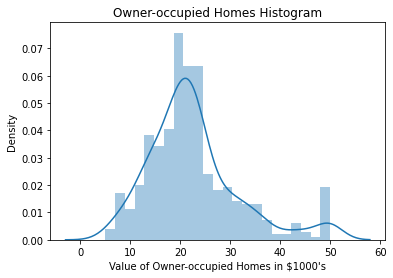

In [7]:
plot = sns.distplot(boston_df["MEDV"])
plot.set_xlabel("Value of Owner-occupied Homes in $1000's")
plot.set_title("Owner-occupied Homes Histogram")
pyplot.plot()

[]

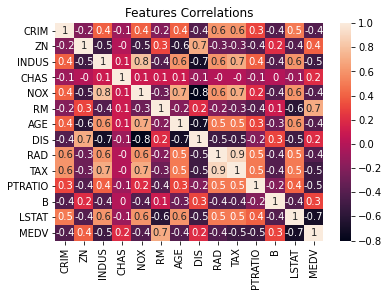

In [8]:
plot = sns.heatmap(boston_df.corr().round(1), annot=True)
plot.set_title("Features Correlations")
pyplot.plot()

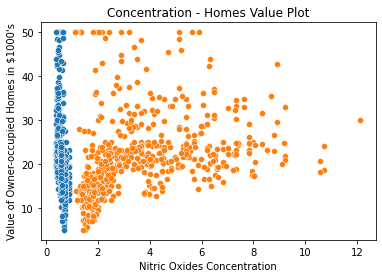

In [9]:
for feature in ["NOX", "DIS"]:
    plot = sns.scatterplot(data=boston_df, x=feature, y="MEDV")
    plot.set_xlabel("Nitric Oxides Concentration")
    plot.set_ylabel("Value of Owner-occupied Homes in $1000's")
    plot.set_title("Concentration - Homes Value Plot")
    plot.plot()

## Dataset Splitting

In [10]:
X = boston_df[["RM", "LSTAT"]]
y = boston_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SPLIT_RATIO)

## Linear Regression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = np.abs(model.predict(X_test))

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("The linear model has the RMSE of {:.2f} and the R2 score of {:.2f}.".format(rmse, r2))

The linear model has the RMSE of 5.70 and the R2 score of 0.63.


## Polynomial Regression

In [13]:
for degree in range(MIN_POLYNOMIAL_DEGREE, MAX_POLYNOMIAL_DEGREE + 1):
    transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transformed, y_train)

    y_pred = np.abs(model.predict(X_test_transformed))
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("The polynomial model with the degree of {} has the RMSE of {:.2f} and the R2 score of {:.2f}.".format(degree, rmse, r2))

The polynomial model with the degree of 2 has the RMSE of 4.95 and the R2 score of 0.72.
The polynomial model with the degree of 3 has the RMSE of 4.95 and the R2 score of 0.72.
The polynomial model with the degree of 4 has the RMSE of 5.20 and the R2 score of 0.70.
The polynomial model with the degree of 5 has the RMSE of 5.07 and the R2 score of 0.71.
